In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#payload weight 
pax = 243
Wpax = 231*81
Wcab1 = 12*20
Wcab2 = 231*10
Wc2 = 231*23
Wc1 = 12*2*32
Wpl = Wpax + Wcab1 + Wcab2 + Wc1 + Wc2
ncrew= 8         #no. of crew(including pilot)
Wcrew = ncrew*(79.4)      # in kg, 79.4 kg-avg weight, 13.6 kg- luggage weight
R1= 6500*0.621371       # in miles
Wto = 110e03       #in kg (Wto guess)
tol=1e05 

In [5]:
Wpl

27342

In [6]:
while tol > 1e-5 : 
  W1 = 0.99*Wto      #Engine start and warm-up
  W2 = 0.99*W1        #Taxi: 
  W3 = 0.995*W2         #Takeoff 
  W4 = 0.980*W3         #Climb to cruise alt and acc to cruise 
  W4 = W4*2.2046226218488         #conversion to lbf
  cj = 0.7
  Vc = 470 #knots
  L_D = 17
  W5 = W4/(np.exp(R1*cj/(Vc*L_D)))        #in lbf
  W5 = W5/2.2046226218488             #conversion to kg
  cj_ltr = 0.5  #specific fuel consumption for the class of Transport jet (in lb/lbf-hr)
  L_D_ltr = 17 # L/D for the class of Transport jet
  E = 20/60    # Endurance for loiter in hr
  W6 = W5/(np.exp(E*cj_ltr/(L_D_ltr)))
  W7 = 0.990*W6            # Descent
  W8 = 0.992*W7           #Landing, taxi and shutdown
  Wf_used = Wto - W8
  Wf_Res = Wf_used * 0.1   # reverse fuel- 45 mins
  Wf = Wf_used + Wf_Res
  #
  WOEtent = Wto - Wf - Wpl 
  Wtfo = 0.005 * Wto
  WEtent = WOEtent - Wtfo - Wcrew
  #
  Ks =0.8
  We = Ks * 0.842 * Wto ** 0.947
  tol= abs(We-WEtent)
  Woe = We + Wtfo + Wcrew
  Wto = Woe + Wf + Wpl

In [7]:
print(Wf_used, W7)

39053.08582673267 73898.87621785823


In [8]:
We

40863.37277886634

In [9]:
R  = np.array([0.6*R1 ,0.7*R1, 0.8*R1, 0.9*R1, R1, 1.1*R1, 1.2*R1, 1.3*R1])
print(R)

[2423.3469  2827.23805 3231.1292  3635.02035 4038.9115  4442.80265
 4846.6938  5250.58495]


In [10]:
MTOW= []

for r in R:
  tol=1e05 
  while tol > 1e-5 : 
    W1 = 0.99*Wto      #Engine start and warm-up
    W2 = 0.99*W1        #Taxi: 
    W3 = 0.995*W2         #Takeoff 
    W4 = 0.980*W3         #Climb to cruise alt and acc to cruise 
    W4 = W4*2.2046226218488         #conversion to lbf
    cj = 0.7
    Vc = 470 #knots
    L_D = 17
    W5 = W4/(np.exp(r*cj/(Vc*L_D)))        #in lbf
    W5 = W5/2.2046226218488             #conversion to kg
    cj_ltr = 0.5  #specific fuel consumption for the class of Transport jet (in lb/lbf-hr)
    L_D_ltr = 17 # L/D for the class of Transport jet
    E = 20/60    # Endurance for loiter in hr
    W6 = W5/(np.exp(E*cj_ltr/(L_D_ltr)))
    W7 = 0.990*W6            # Descent
    W8 = 0.992*W7           #Landing, taxi and shutdown
    Wf_used = Wto - W8
    Wf_Res = Wf_used * 0.1   # reverse fuel- 45 mins
    Wf = Wf_used + Wf_Res
    #
    WOEtent = Wto - Wf - Wpl 
    Wtfo = 0.005 * Wto
    WEtent = WOEtent - Wtfo - Wcrew
    #
    Ks =0.8
    We = Ks * 0.842 * Wto ** 0.947
    tol= abs(We-WEtent)
    Woe = We + Wtfo + Wcrew
    Wto = Woe + Wf + Wpl
  MTOW.append(Wto)
print(MTOW)

[79613.77162149212, 86284.55485078247, 93840.49444967706, 102457.71081683021, 112360.77104619532, 123840.10224864275, 137277.29727512348, 153182.71729929798]


In [11]:
R = R/0.621371  
print(R)

[3900. 4550. 5200. 5850. 6500. 7150. 7800. 8450.]


Text(0, 0.5, ' TOGW (kg)')

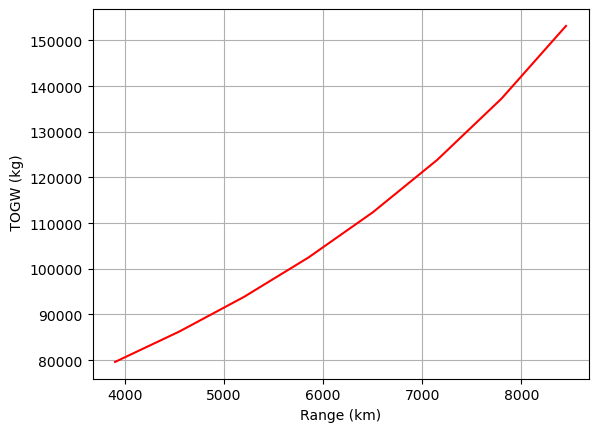

In [12]:
plt.grid()
plt.plot(R,MTOW,'r')
plt.xlabel('Range (km)')
plt.ylabel(' TOGW (kg)')

In [13]:
MTOW[5]

123840.10224864275

In [14]:
print(Wf_used, W7)

63306.99029721647 90600.53124401691


Max Range of the aircraft is:  7285665.026


(54801.91438590345, 84884.01010519863)

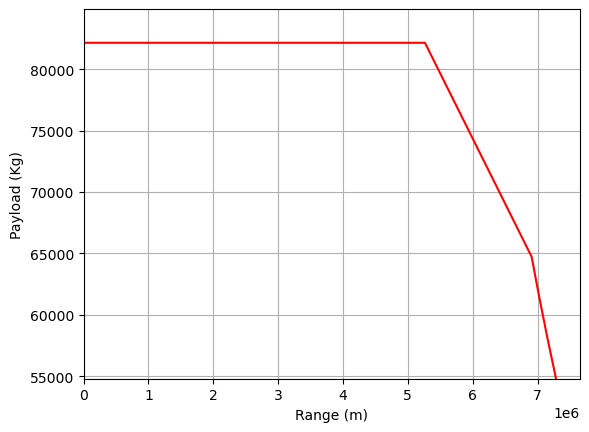

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# WTO
WA = We+Wpl
WB = We+1*Wf+Wpl
W_TO = We+1*Wf+Wpl
Wfle = 0.25*Wf
W_ple = Wpl-Wfle
W_E = We+W_ple
W_plf = (2/3)*(W_ple)
W_F = We+W_plf
W_G = W_TO-((1/3)*W_ple)
W_plh = (1/3)*W_ple
W_H = We+W_plh
W_I  = W_TO-W_plf
W_D = W_TO - W_ple
e = 0.9244
k = 0.0344 #0.0607
C_D0 = 0.033 #0.0376
ct = 0.5/(3600)
rho  = 0.38
S = 122

W1 = np.array([WA, WA, W_E, W_F, W_H, We])
W0 = np.array([WA ,WB ,W_TO ,W_G ,W_I ,W_D])


  
L_D = (3/4)*(1/(3*C_D0**3 *k))**(1/4)
R = (2/ct)*(2/(rho*S))**(1/2) *(L_D) * (W0**0.5 - W1**0.5)

print('Max Range of the aircraft is: ' ,round(max(R),3))

plt.grid()
plt.plot(R,W1,'r')
plt.xlabel('Range (m)')
plt.ylabel('Payload (Kg)')
plt.xlim(0,1.05*max(R))
plt.ylim(We,1.05*We+Wpl)

In [16]:
cf = 0.7*9.8*0.4536/(4.448*3600)
print(cf)

0.00019432553956834532


In [17]:
while tol > 1e-5 : 
  W1 = 0.99*Wto      #Engine start and warm-up
  W2 = 0.99*W1        #Taxi: 
  W3 = 0.995*W2         #Takeoff 
  W4 = 0.980*W3         #Climb to cruise alt and acc to cruise 
  W4 = W4*2.2046226218488         #conversion to lbf
  cj = 0.7
  Vc = 470 #knots
  L_D = 15
  W5 = W4/(np.exp(R*cj/(Vc*L_D)))        #in lbf
  W5 = W5/2.2046226218488             #conversion to kg
  W6 = 0.990*W5            # Descent
  W7 = 0.992*W6           #Landing, taxi and shutdown
  Wf_used = Wto - W7
  Wf_Res = Wf_used * 0.1   # reverse fuel- 45 mins
  Wf = Wf_used + Wf_Res
  #
  WOEtent = Wto - Wf - Wpl 
  Wtfo = 0.005 * Wto
  WEtent = WOEtent - Wtfo - Wcrew
  #
  Ks =0.8
  We = Ks * 0.842 * Wto ** 0.947
  tol= abs(We-WEtent)
  Woe = We + Wtfo + Wcrew
  Wto = Woe + Wf + Wpl